In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median, StatisticsError

In [14]:
table = pd.read_excel('10.22.xlsx')

# Общая оценка

Размеры датасета

In [15]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_2,Подразделение_3,Подразделение_4,Должность
0,1,нет,нет,есть,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Ведущий инженер по сопровождению
1,2,нет,нет,NaN,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Руководитель направления
2,3,нет,нет,NaN,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0,Руководитель направления
3,4,нет,нет,NaN,ПАО Сбербанк (ЦА),"Блок ""Технологии""",271.0,Исполнительный директор
4,5,нет,нет,NaN,ПАО Сбербанк (ЦА),"Блок ""Технологии""",239.0,Исполнительный директор


In [16]:
print(table.shape)
print(len(table))

(44729, 8)
44729


Уникальные значения в столбцах

In [17]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_2,Подразделение_3,Подразделение_4,Должность
0,1,нет,нет,есть,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Ведущий инженер по сопровождению
1,2,нет,нет,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Руководитель направления
2,3,нет,нет,нет,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0,Руководитель направления
3,4,нет,нет,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",271.0,Исполнительный директор
4,5,нет,нет,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",239.0,Исполнительный директор


In [18]:
table['Переход_по_ссылке'].unique()

array(['нет', 'есть'], dtype=object)

In [19]:
table['Ввод_данных'].unique()

array(['нет', 'есть'], dtype=object)

In [20]:
table['Сообщение_в_ЦПКБ'].unique()

array(['есть', 'нет'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [21]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] in ['есть', 'да'] else 0

In [22]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_2,Подразделение_3,Подразделение_4,Должность
0,1,нет,0,есть,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Ведущий инженер по сопровождению
1,2,нет,0,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",299.0,Руководитель направления
2,3,нет,0,нет,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0,Руководитель направления
3,4,нет,0,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",271.0,Исполнительный директор
4,5,нет,0,нет,ПАО Сбербанк (ЦА),"Блок ""Технологии""",239.0,Исполнительный директор


Проверяем результат

In [23]:
table['Ввод_данных'].unique()

array([0, 1], dtype=int64)

In [24]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [25]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [26]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [27]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Подразделение_2,Подразделение_3,Подразделение_4,Должность
0,1,0,0,1,ПАО Сбербанк (ЦА),Блок Технологии,299.0,Ведущий инженер по сопровождению
1,2,0,0,0,ПАО Сбербанк (ЦА),Блок Технологии,299.0,Руководитель направления
2,3,0,0,0,ПАО Сбербанк (ЦА),Блок Риски,2.0,Руководитель направления
3,4,0,0,0,ПАО Сбербанк (ЦА),Блок Технологии,271.0,Исполнительный директор
4,5,0,0,0,ПАО Сбербанк (ЦА),Блок Технологии,239.0,Исполнительный директор


Подсчет сотрудников

In [28]:
table.value_counts('Должность')

Должность
Руководитель направления                                                       8814
Главный инженер по разработке                                                  6395
Ведущий инженер по разработке                                                  3097
Эксперт                                                                        2862
Менеджер                                                                       2447
                                                                               ... 
Исполнительный директор-директор по депозитным операциям и МБК                    1
Вице-президент по технологическому развитию индустрии электронной коммерции       1
Секретарь вице-президента                                                         1
Исполнительный директор-директор по банкнотным операциям                          1
Вице-президент по цифровым поверхностям Салют                                     1
Length: 371, dtype: int64

In [29]:
len(table.value_counts('Должность'))

371

Подсчет блоков

In [30]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     28794
Блок Корпоративно-инвестиционный     3779
Блок Розничный                       2317
Блок Сервисы                         2064
Блок Управление                      1448
Подразделения вне                    1302
Блок HR                               961
Блок Риски                            885
Блок Финансы                          863
Блок Сеть                             756
Другие подразделения                  702
Блок GR,                              650
Блок Стратегия                        143
Блок Sberbank                          65
dtype: int64

In [31]:
len(table.value_counts('Подразделение_3'))

14

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [32]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [33]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [34]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [35]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

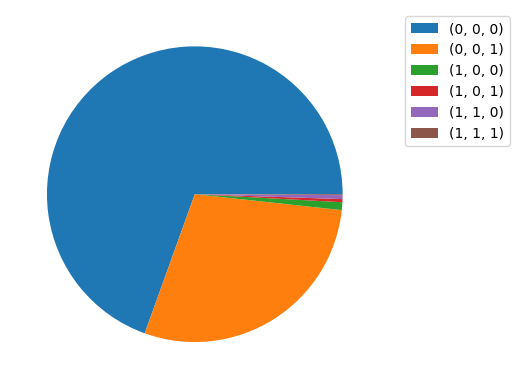

In [36]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [37]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            8814
Главный инженер по разработке       6395
Ведущий инженер по разработке       3097
Эксперт                             2862
Менеджер                            2447
Исполнительный директор             2304
Старший инженер по разработке       1777
Руководитель проектов               1236
Ведущий инженер по сопровождению     989
Ведущий инженер                      939
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [38]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

68.993

Топ 10 должностей в каждом варианте

In [39]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления         5829
Главный инженер по разработке    3945
Эксперт                          2292
Ведущий инженер по разработке    1960
Менеджер                         1809
Исполнительный директор          1589
Старший инженер по разработке    1104
Руководитель проектов             877
Ведущий инженер                   745
Главный инженер                   714
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления            2846
Главный инженер по разработке       2361
Ведущий инженер по разработке       1084
Исполнительный директор              670
Старший инженер по разработке        641
Менеджер                             596
Эксперт                              497
Руководитель проектов                336
Ведущий инженер по сопровождению     297
Инженер по разработке                250
dtype: int64


(1, 0, 0): 
Должность
Руководитель направления         69
Главный инженер по разработке    42
Эксперт                          29
Ведущи

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


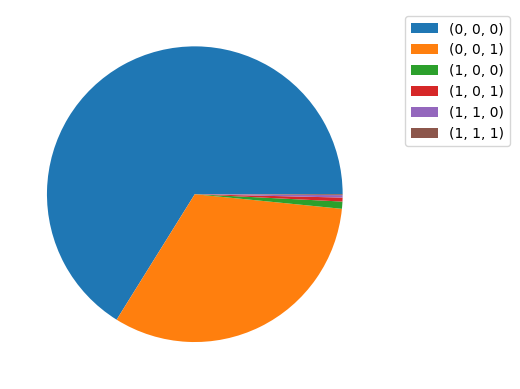

Главный инженер по разработке


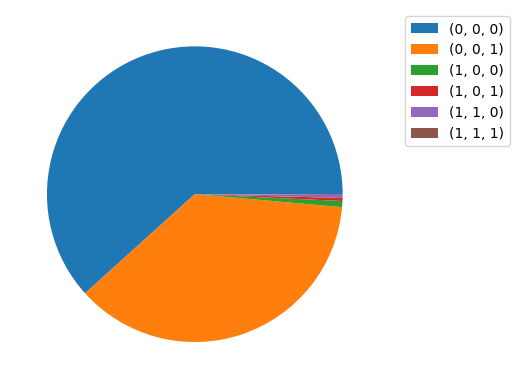

Ведущий инженер по разработке


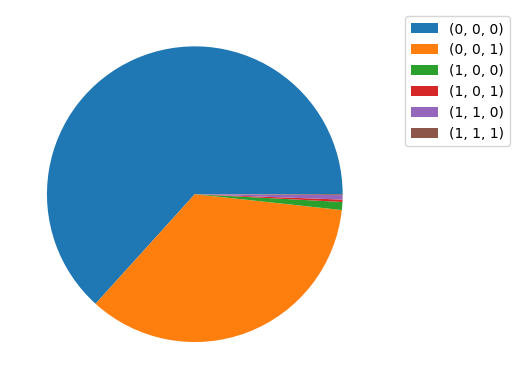

Эксперт


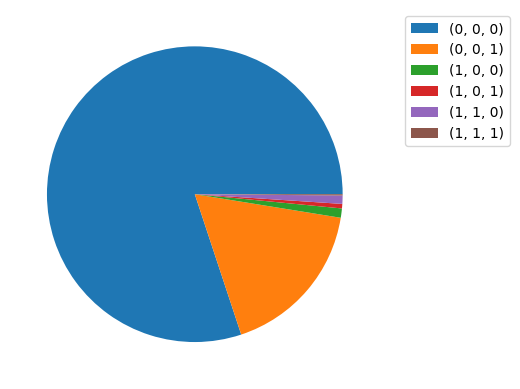

Менеджер


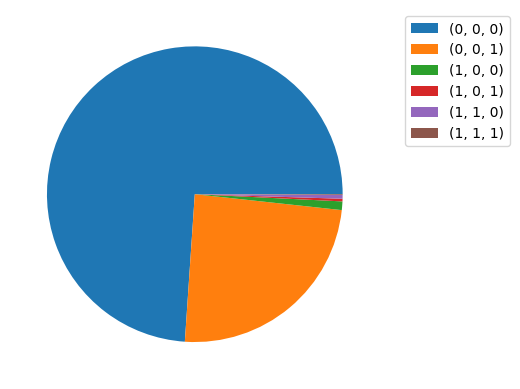

Исполнительный директор


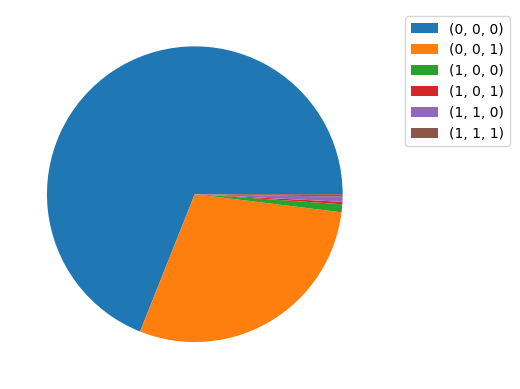

Старший инженер по разработке


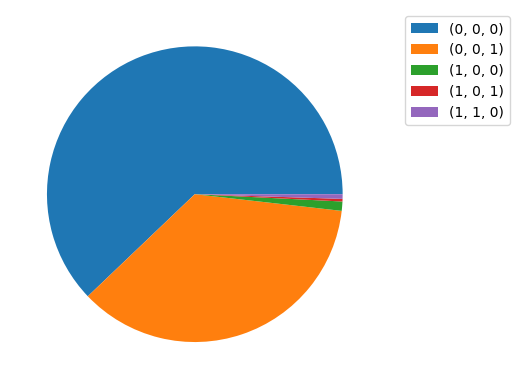

Руководитель проектов


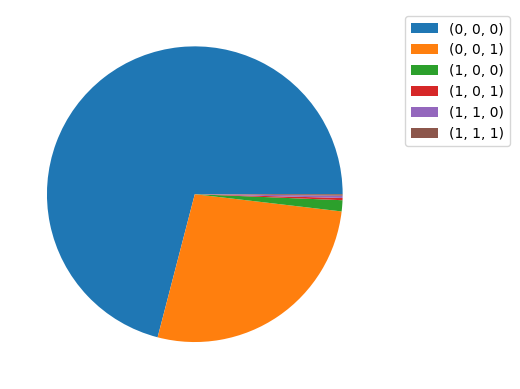

Ведущий инженер по сопровождению


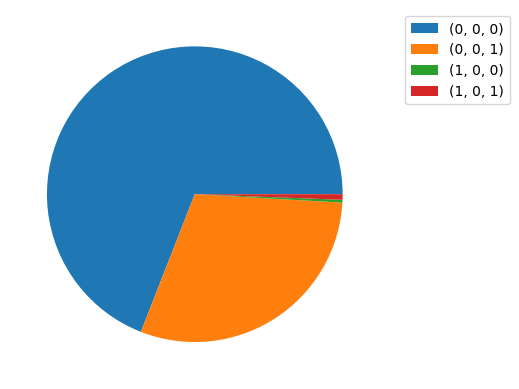

Ведущий инженер


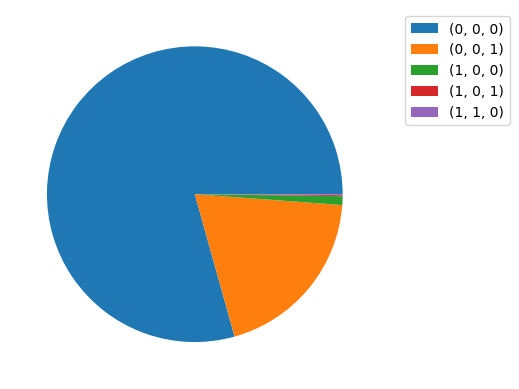

In [40]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [41]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     28794
Блок Корпоративно-инвестиционный     3779
Блок Розничный                       2317
Блок Сервисы                         2064
Блок Управление                      1448
Подразделения вне                    1302
Блок HR                               961
Блок Риски                            885
Блок Финансы                          863
Блок Сеть                             756
dtype: int64

Топ 10 блоков в каждом варианте

In [42]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     19198
Блок Корпоративно-инвестиционный     2877
Блок Розничный                       1704
Блок Управление                      1269
Блок Сервисы                         1211
Подразделения вне                    1097
Блок HR                               794
Блок Финансы                          722
Блок GR,                              548
Блок Сеть                             533
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     9112
Блок Корпоративно-инвестиционный     837
Блок Сервисы                         829
Блок Розничный                       572
Блок Риски                           402
Блок Сеть                            208
Другие подразделения                 194
Подразделения вне                    169
Блок Управление                      150
Блок HR                              149
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     223
Блок Корпоративн

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


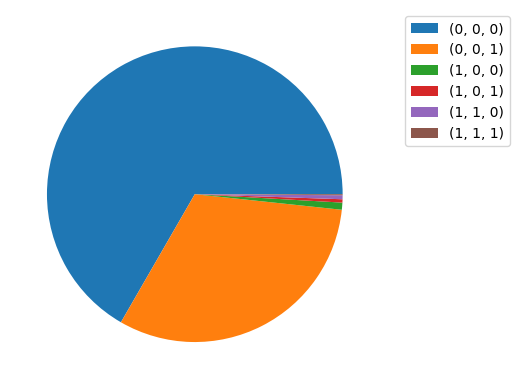

Блок Корпоративно-инвестиционный


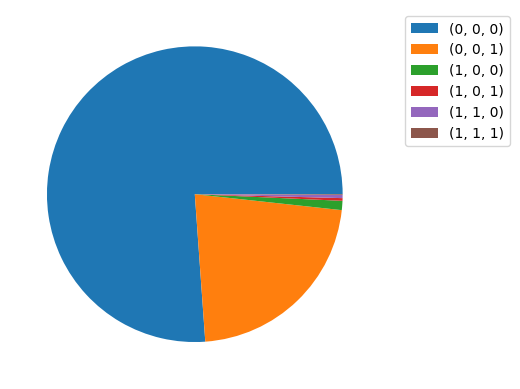

Блок Розничный


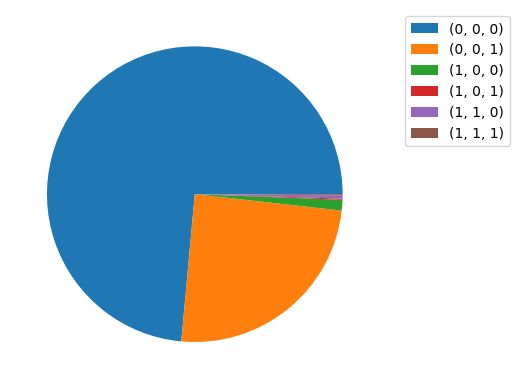

Блок Сервисы


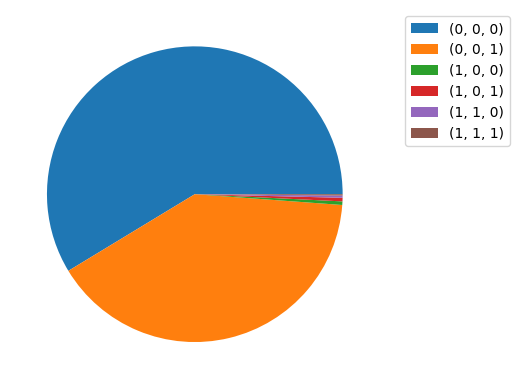

Блок Управление


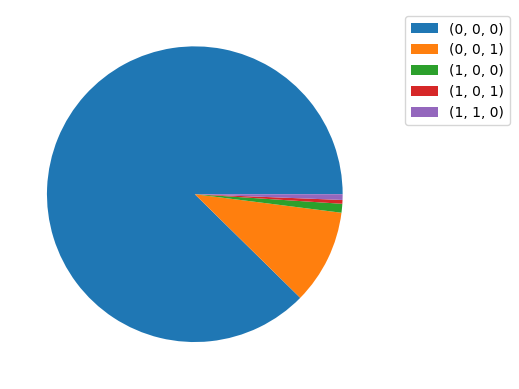

Подразделения вне


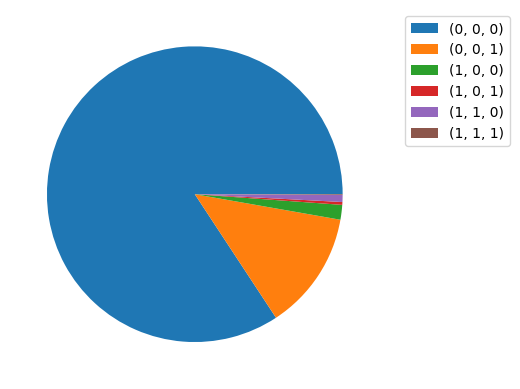

Блок HR


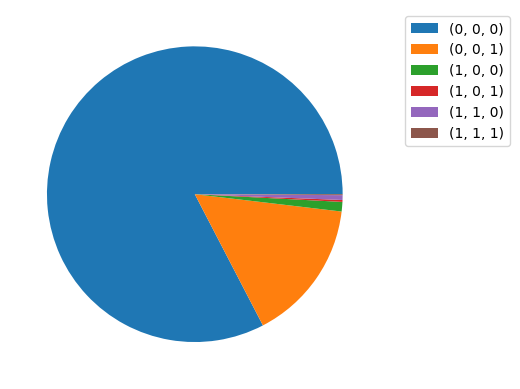

Блок Риски


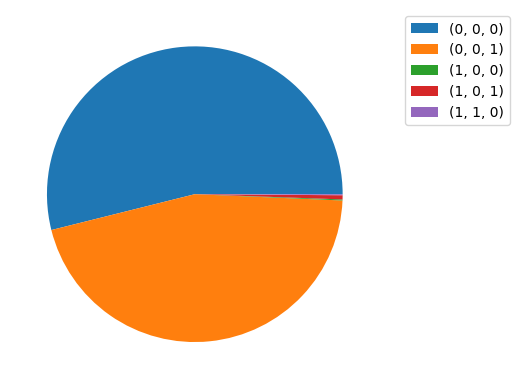

Блок Финансы


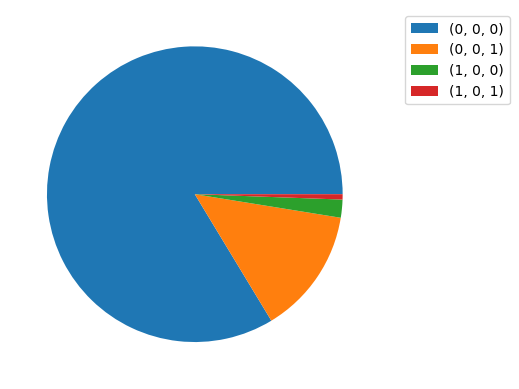

Блок Сеть


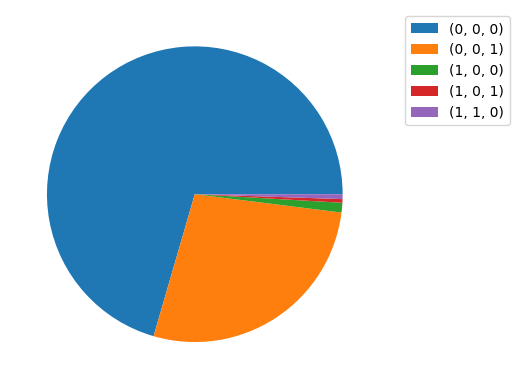

In [43]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [44]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [45]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [46]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [47]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",69.500771,30.499229
"(0, 0, 1)","(0, 0, 1)",28.779986,71.220014
"(1, 0, 0)","(1, 0, 0)",0.854032,99.145968
"(1, 0, 1)","(1, 0, 1)",0.335353,99.664647
"(1, 1, 0)","(1, 1, 0)",0.429252,99.570748
"(1, 1, 1)","(1, 1, 1)",0.100606,99.899394


Соотношение объема каждого исхода к общему объему на графике

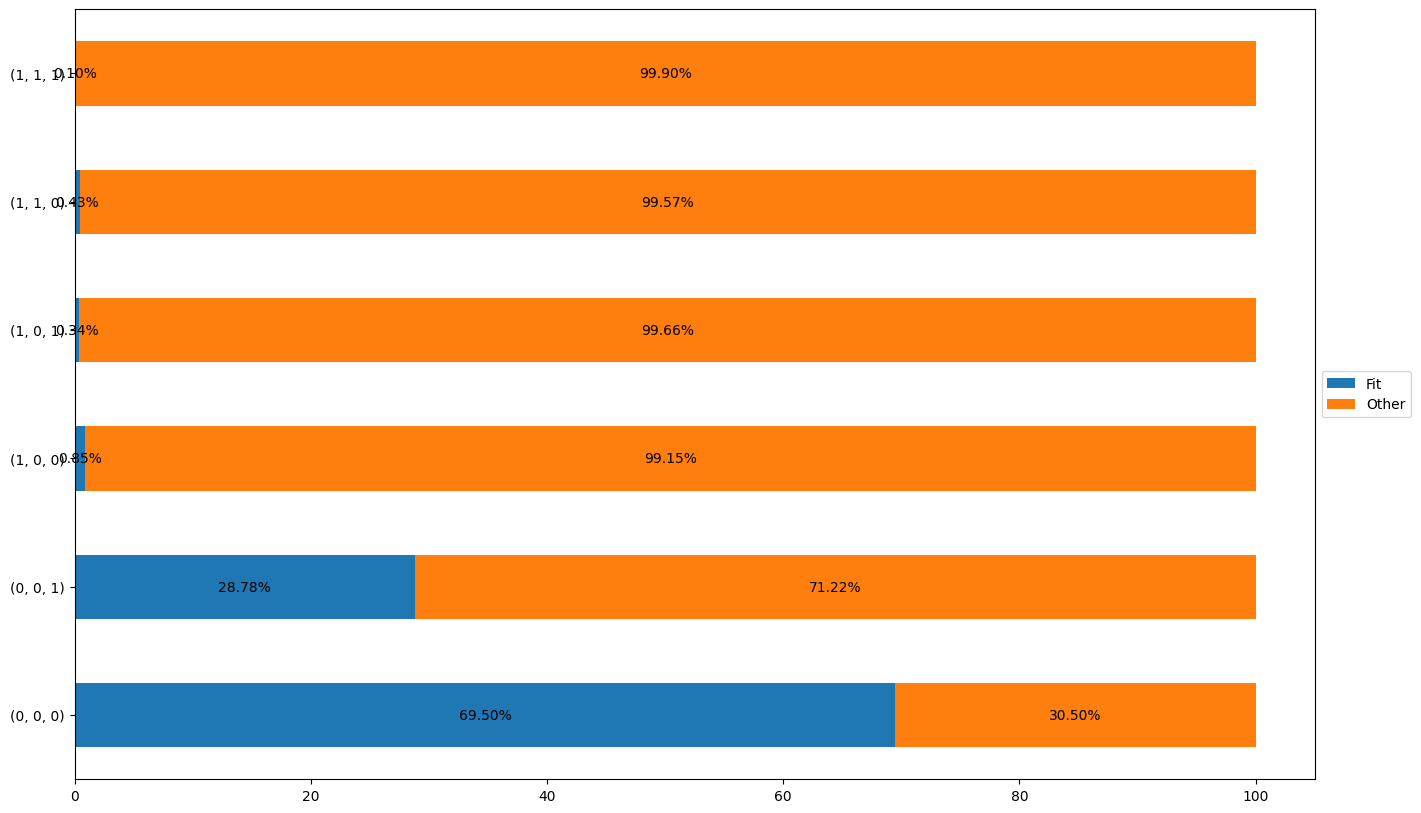

In [48]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [49]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [50]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [51]:
full_temp_table

,Подразделение_3,Должность,Исход
0,Блок Технологии,Ведущий инженер по сопровождению,"(0, 0, 1)"
1,Блок Технологии,Руководитель направления,"(0, 0, 0)"
2,Блок Риски,Руководитель направления,"(0, 0, 0)"
3,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
4,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
...,...,...,...
44724,Блок Технологии,Главный инженер по разработке,"(0, 0, 0)"
44725,Блок Технологии,Старший инженер по разработке,"(0, 0, 0)"
44726,Блок Технологии,Старший инженер по разработке,"(0, 0, 0)"
44727,Блок HR,Стажер-инженер,"(0, 0, 0)"


In [52]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [53]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [54]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


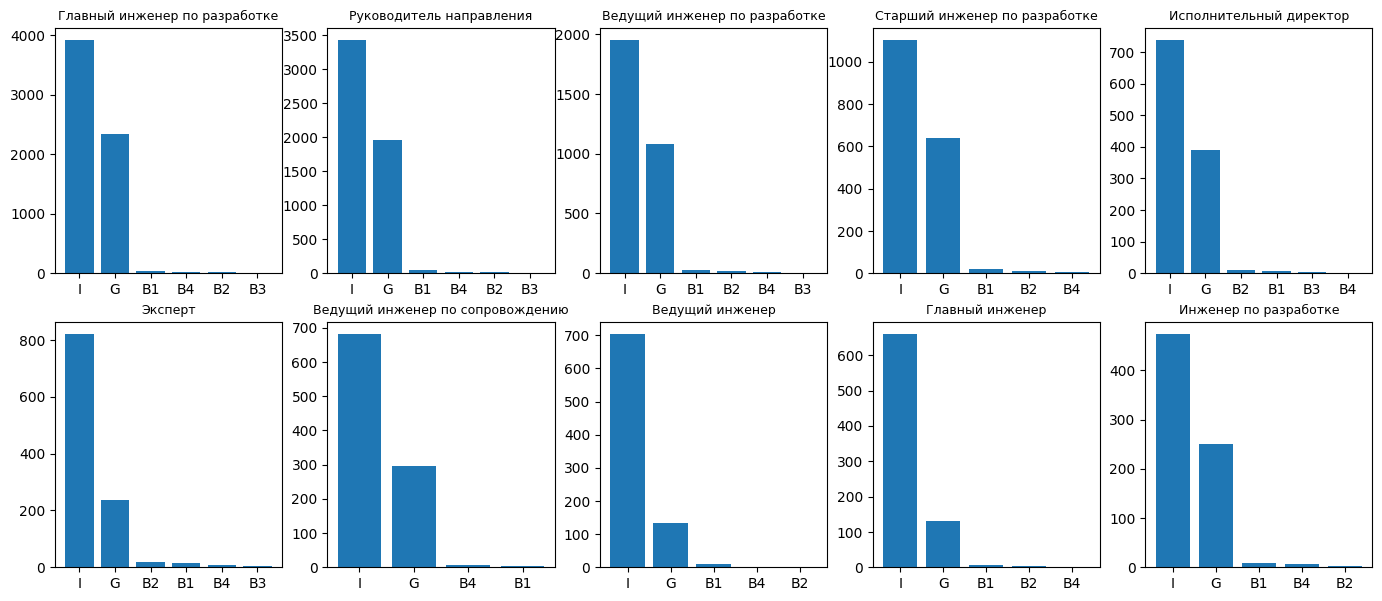

Блок Риски


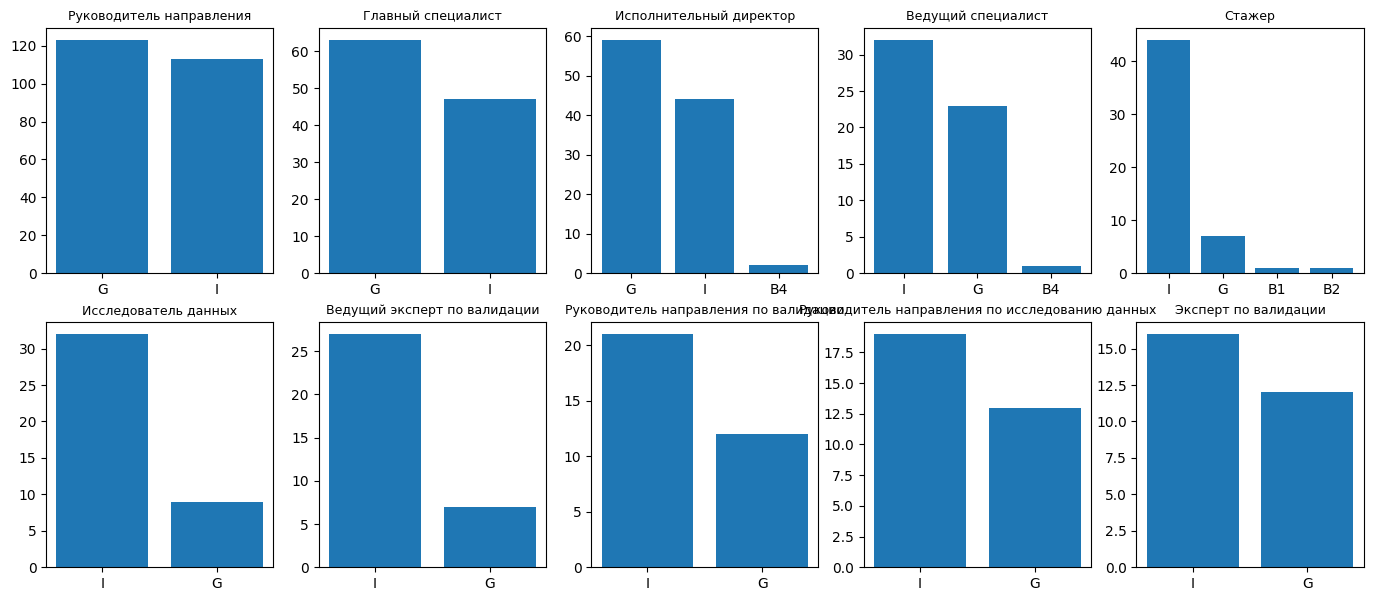

Другие подразделения


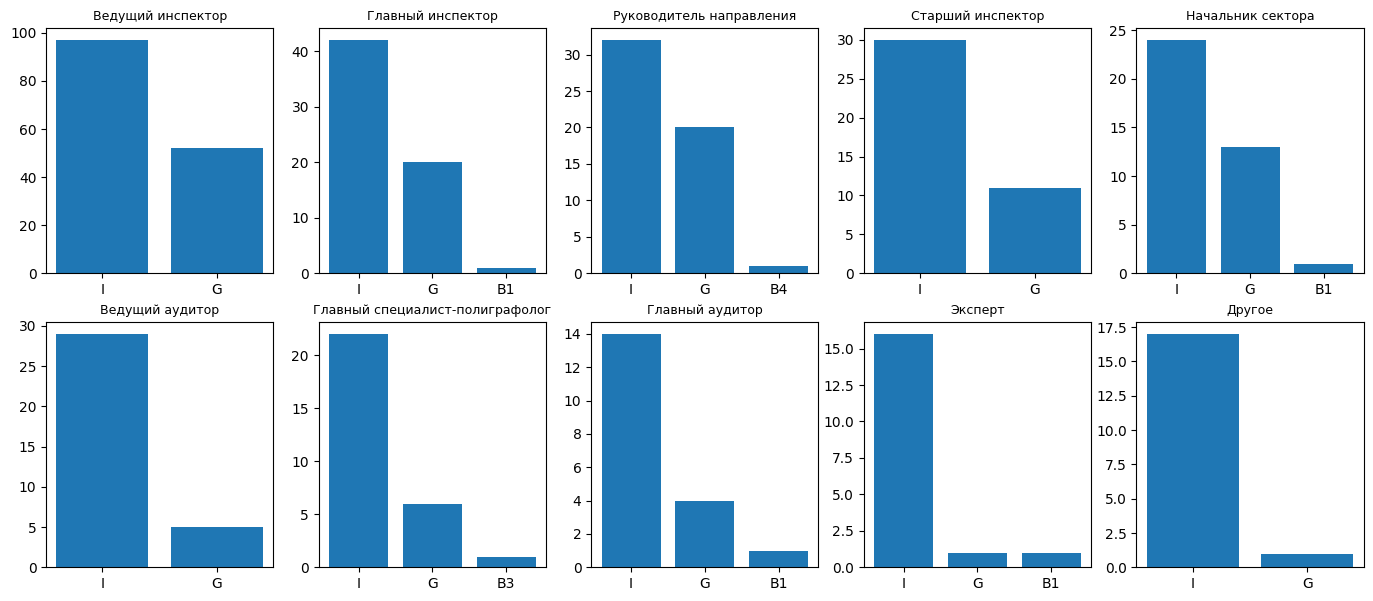

Блок HR


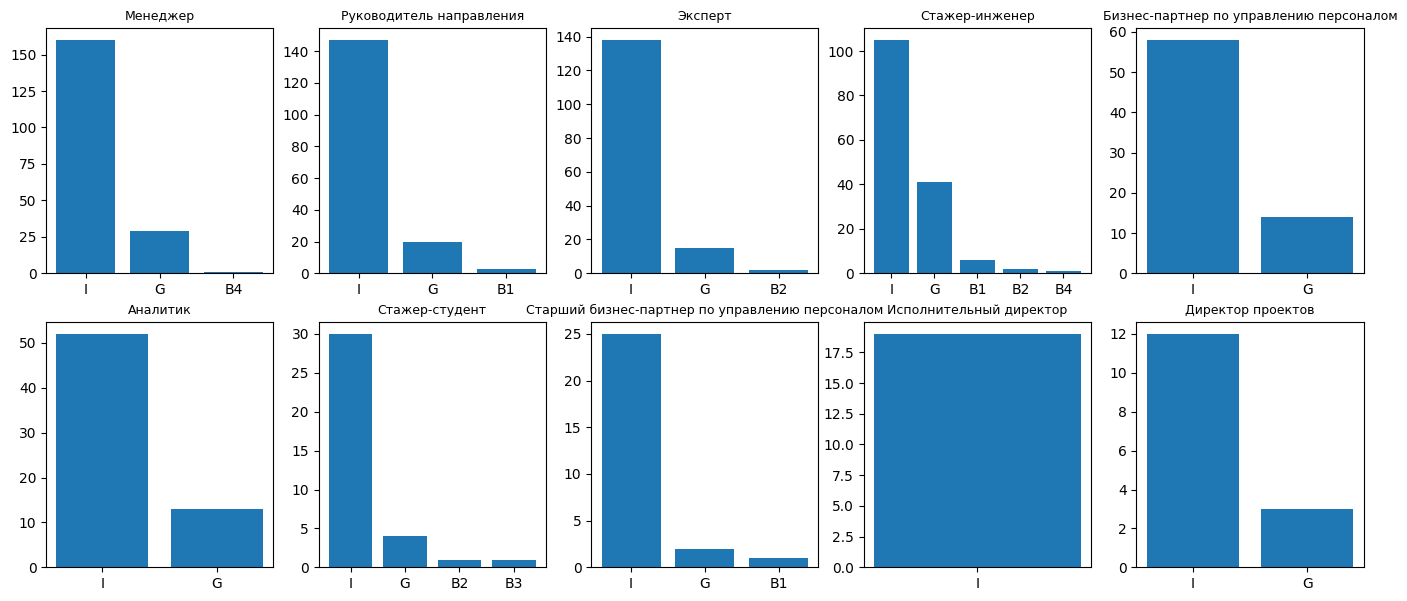

Блок Корпоративно-инвестиционный


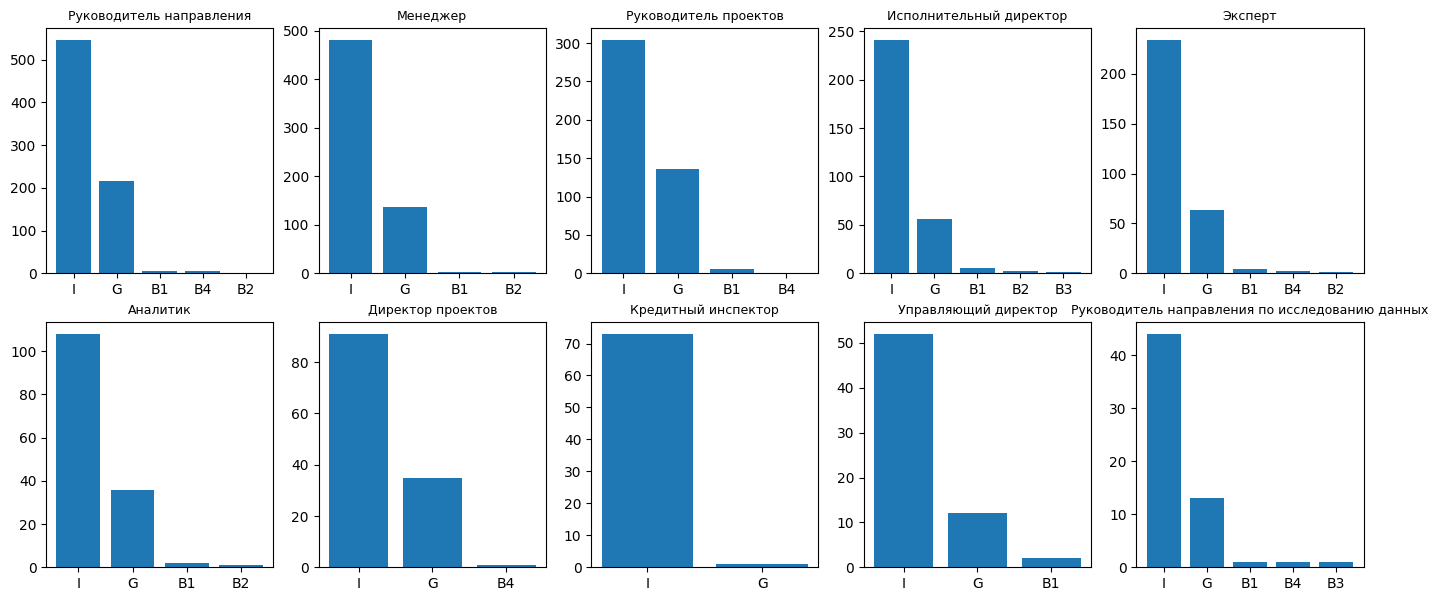

Блок Сервисы


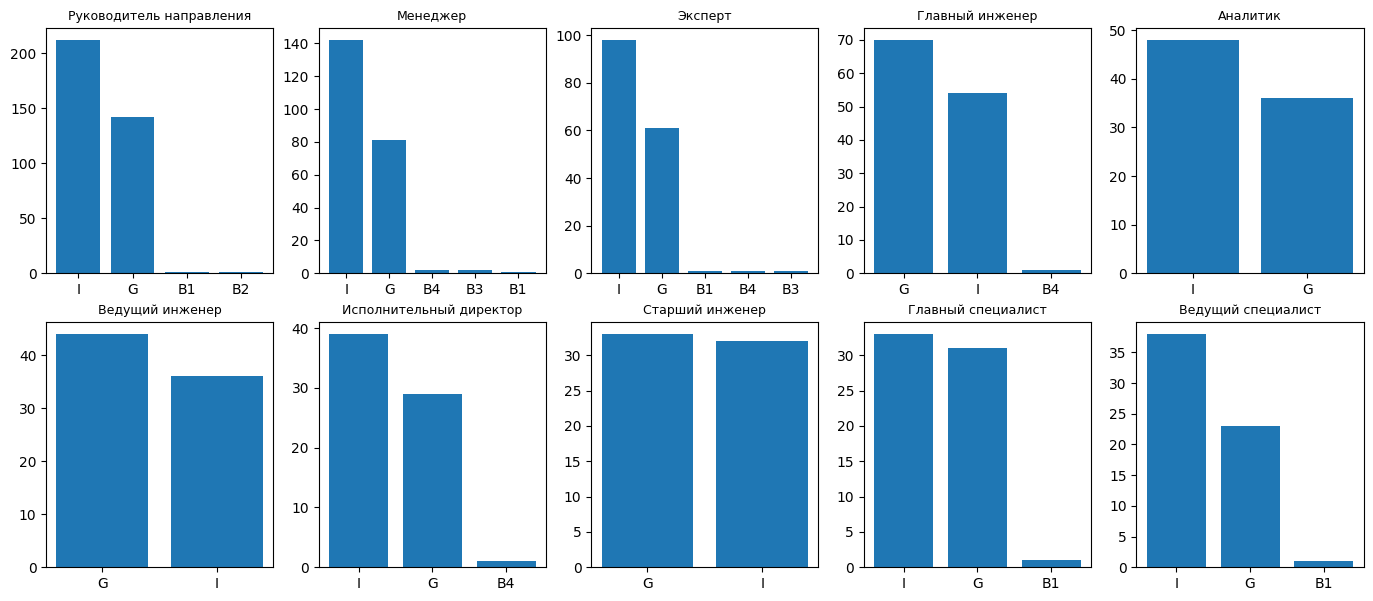

Блок GR,


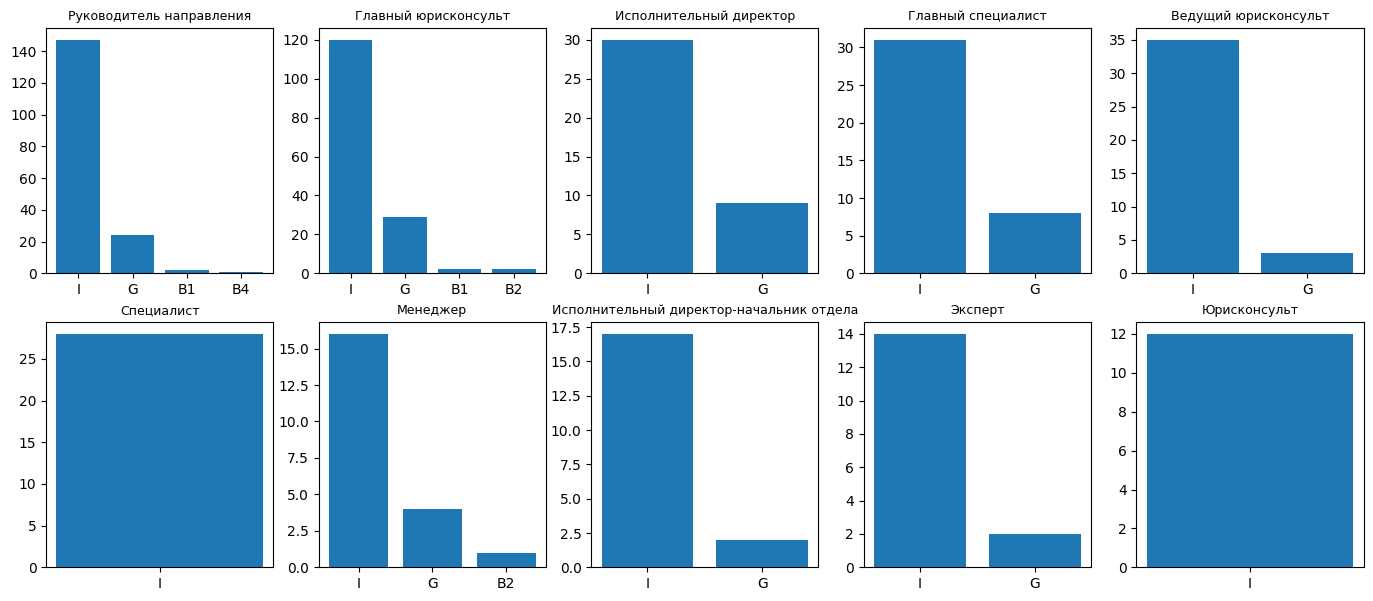

Блок Финансы


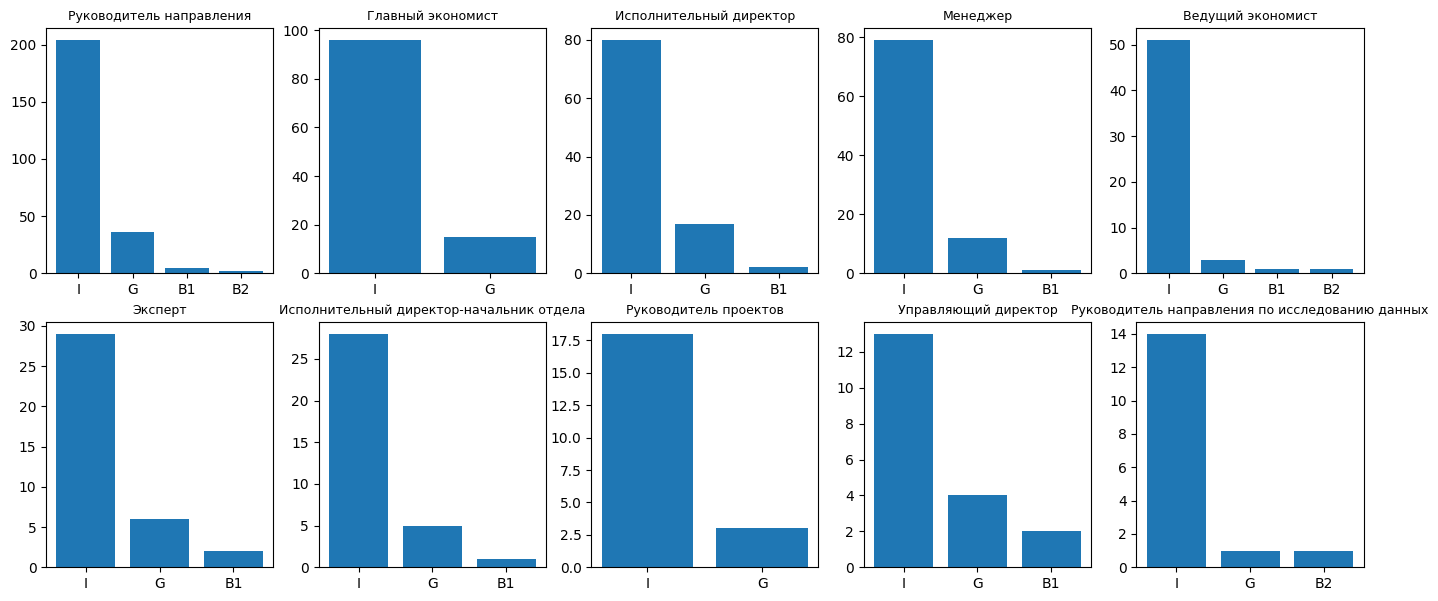

Блок Стратегия


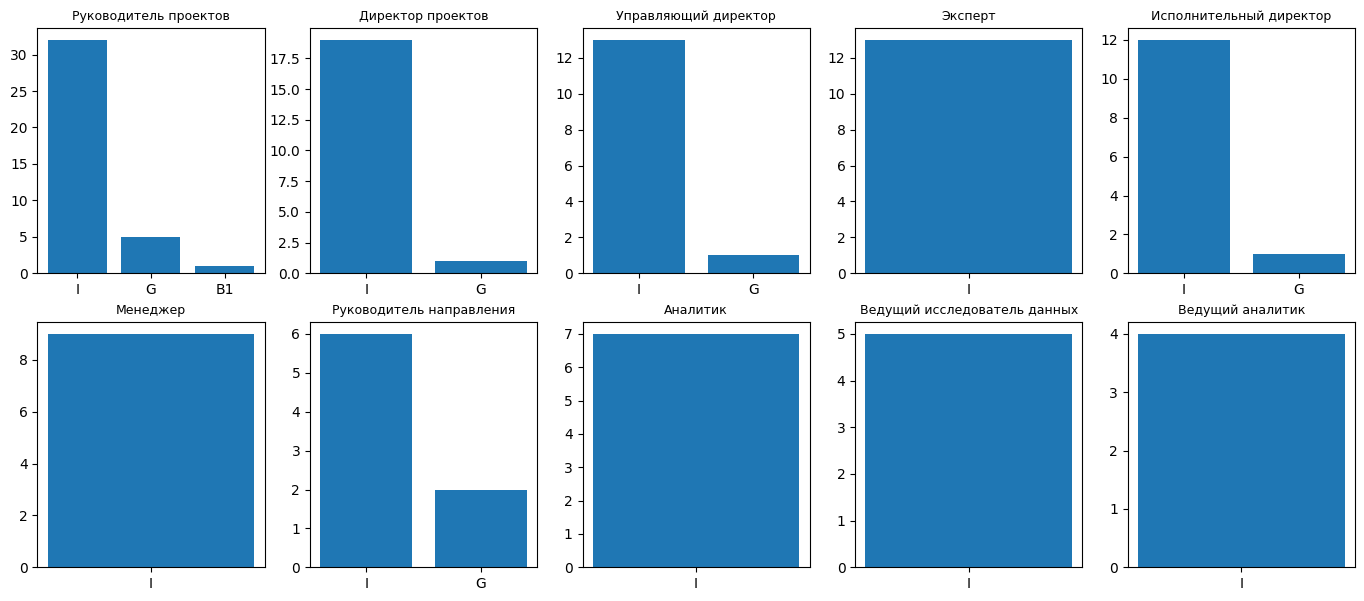

Блок Розничный


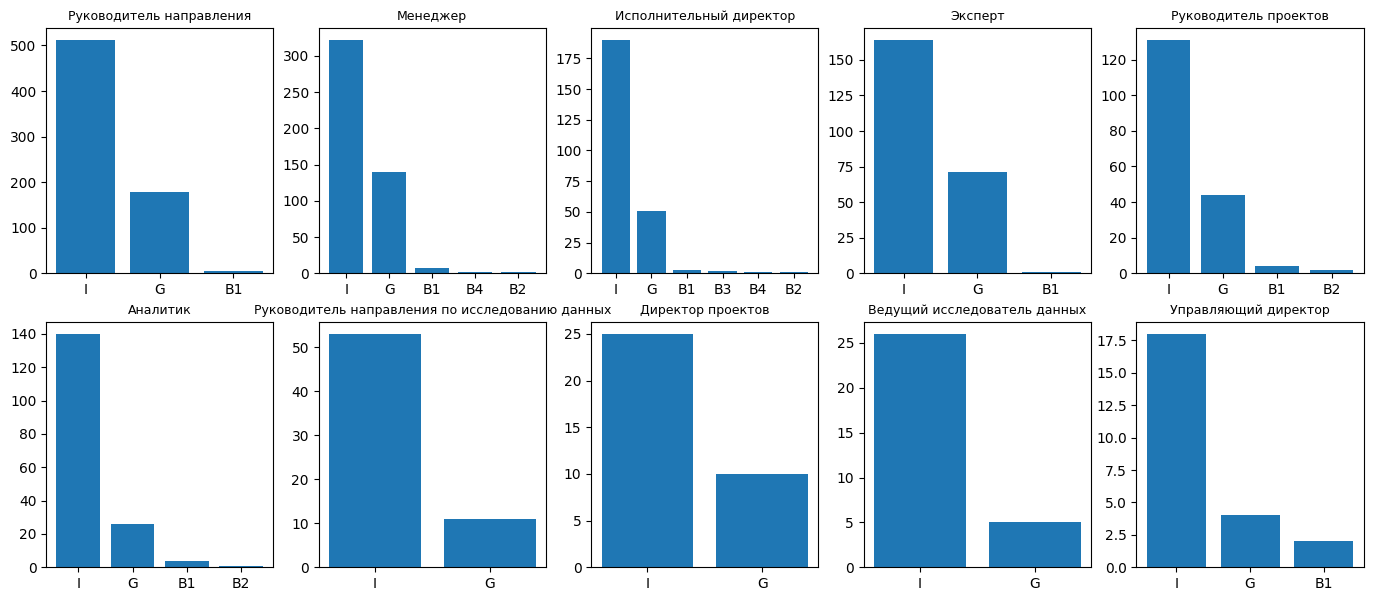

Подразделения вне


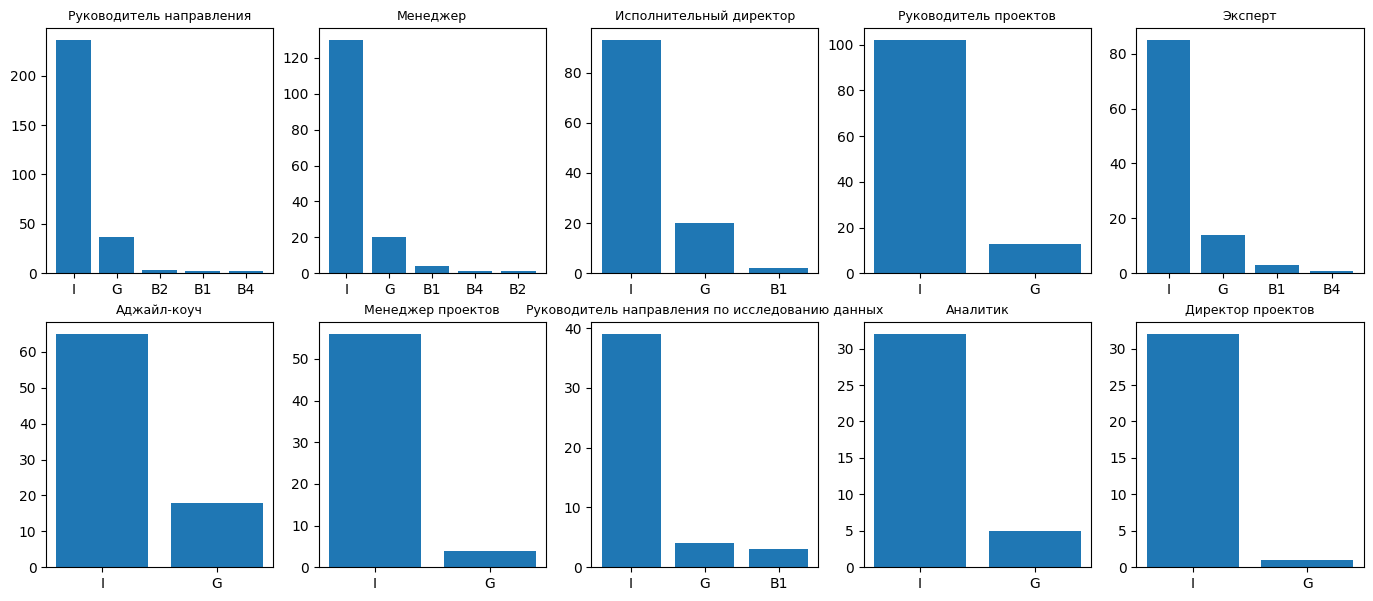

Блок Сеть


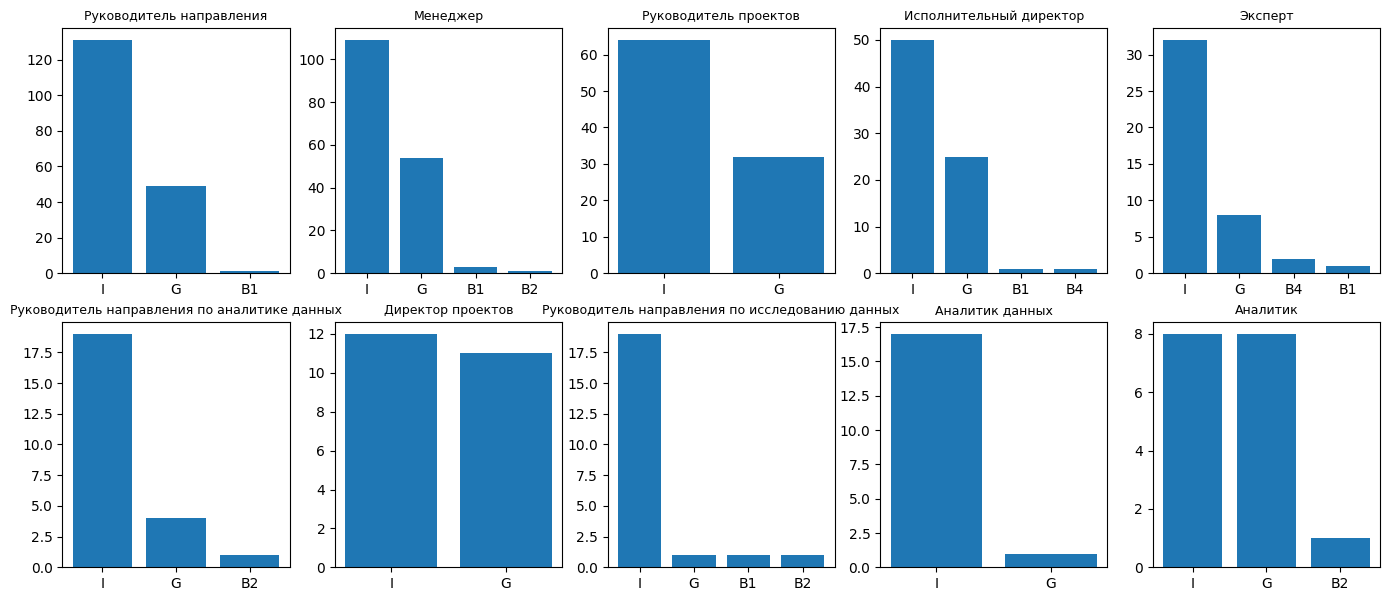

Блок Управление


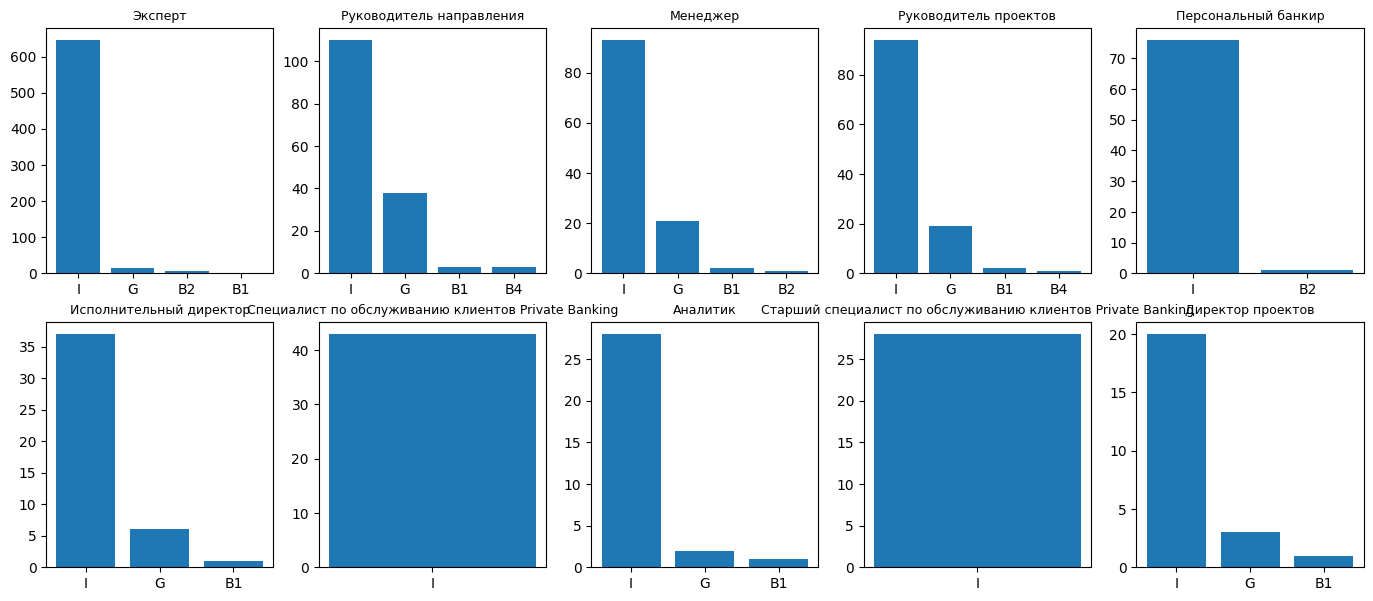

Блок Sberbank


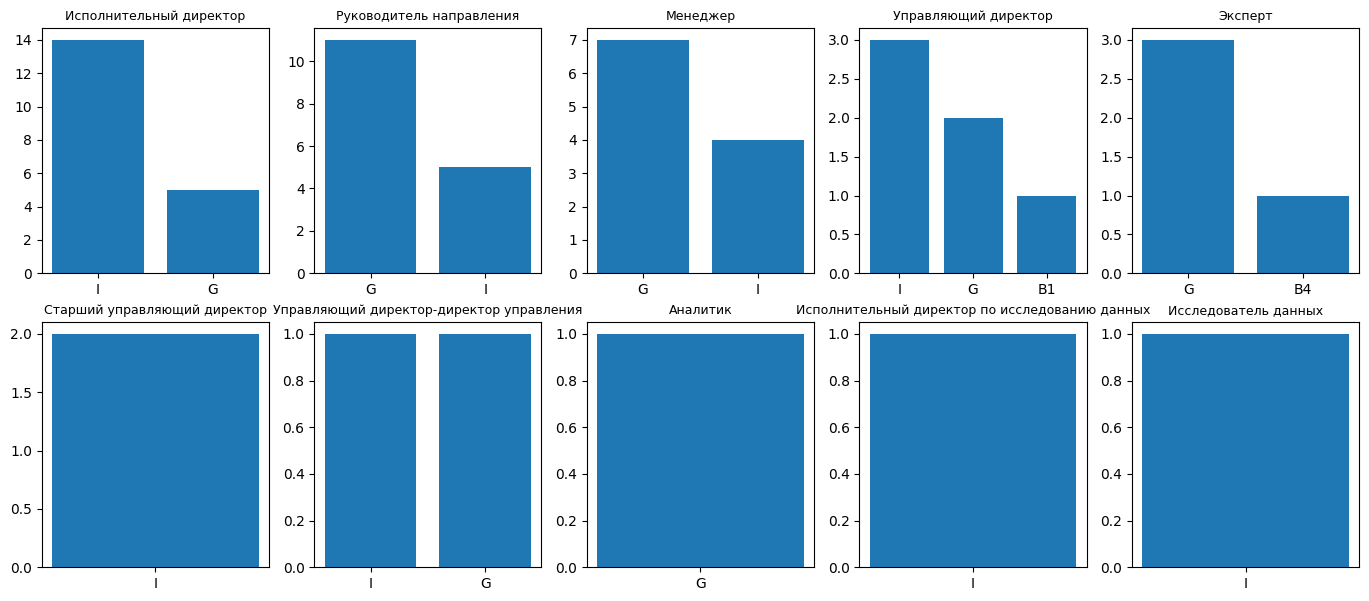

In [55]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [56]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [57]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

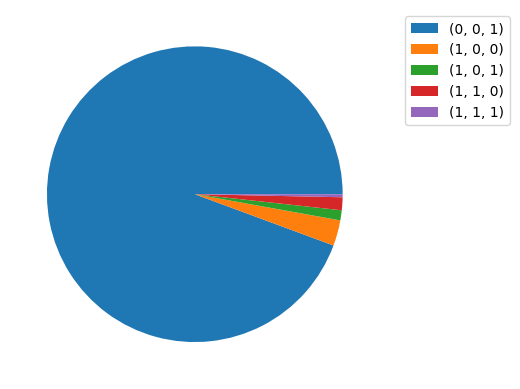

In [58]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


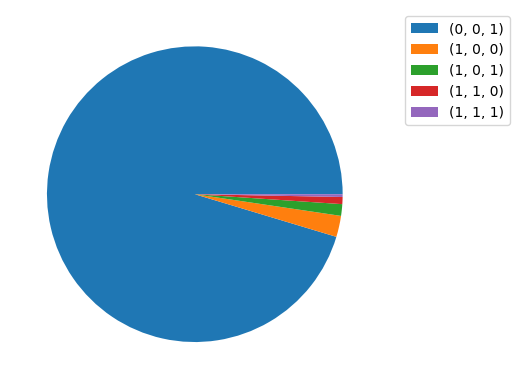

Главный инженер по разработке


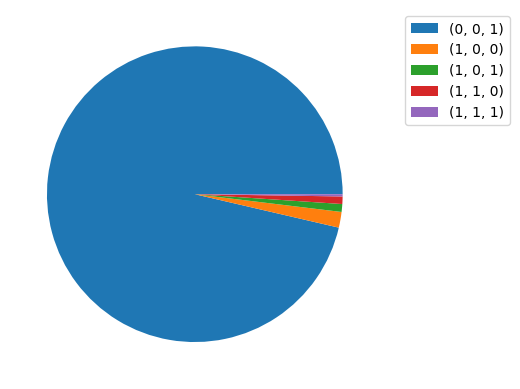

Ведущий инженер по разработке


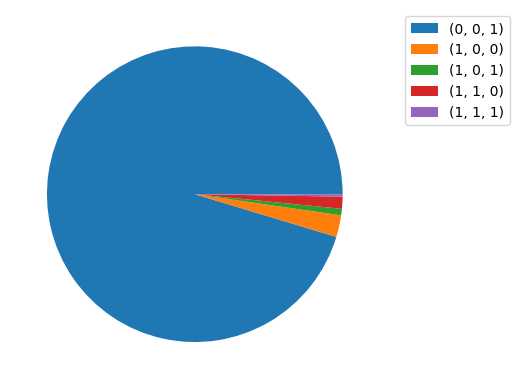

Эксперт


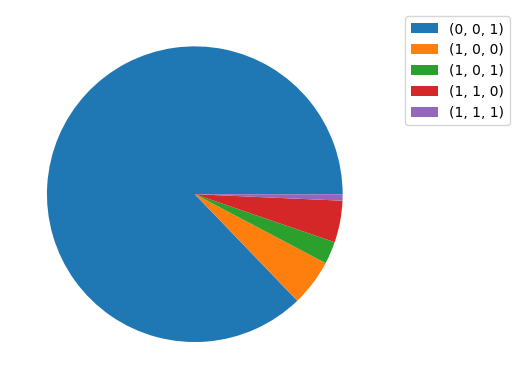

Менеджер


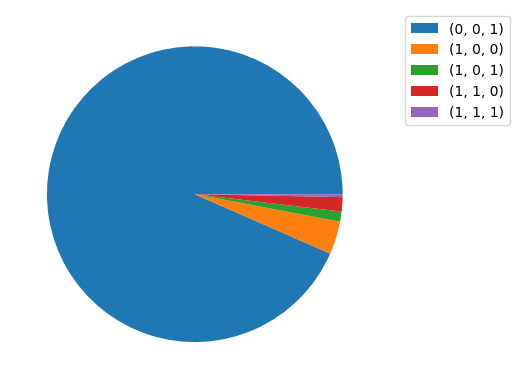

Исполнительный директор


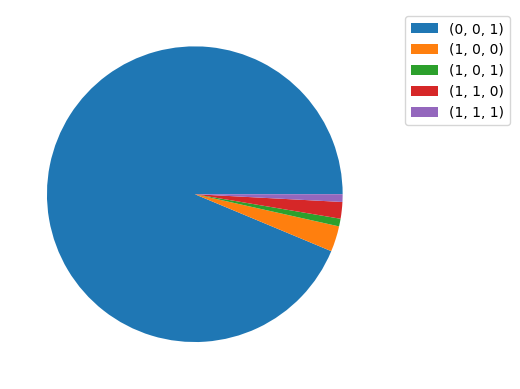

Старший инженер по разработке


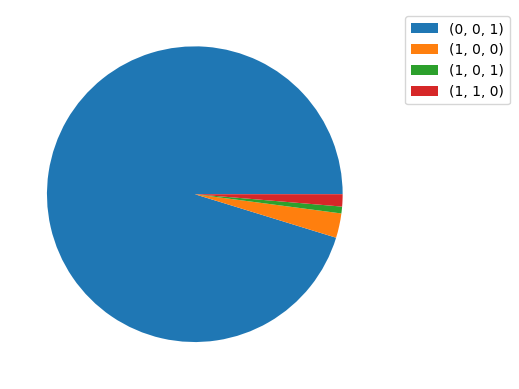

Руководитель проектов


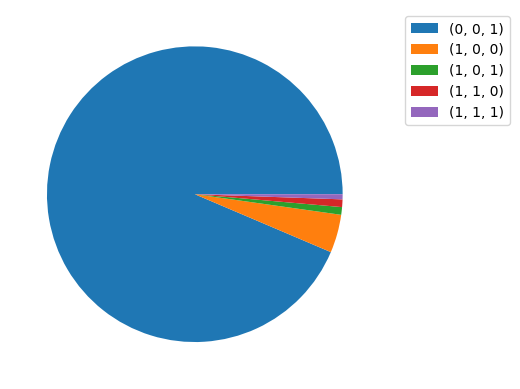

Ведущий инженер по сопровождению


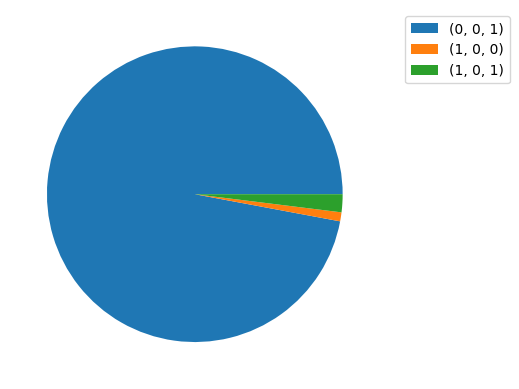

Ведущий инженер


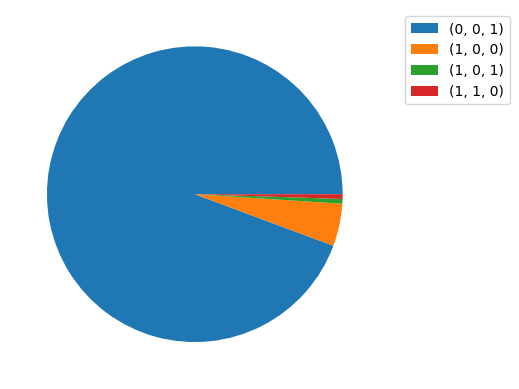

In [59]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


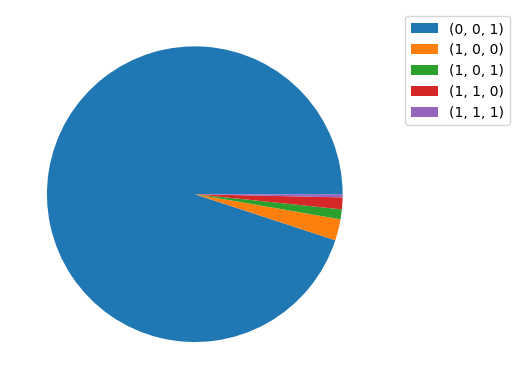

Блок Корпоративно-инвестиционный


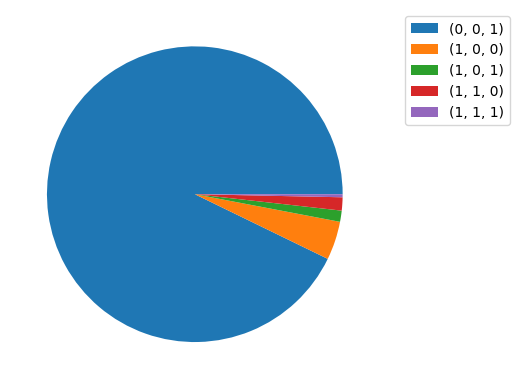

Блок Розничный


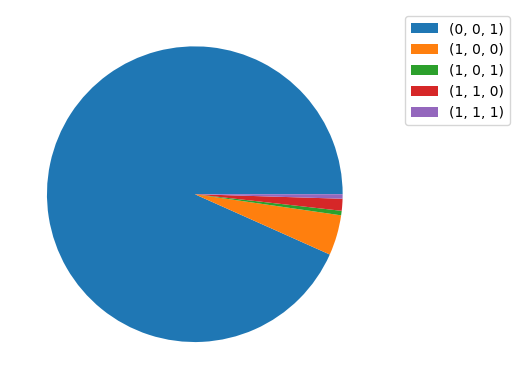

Блок Сервисы


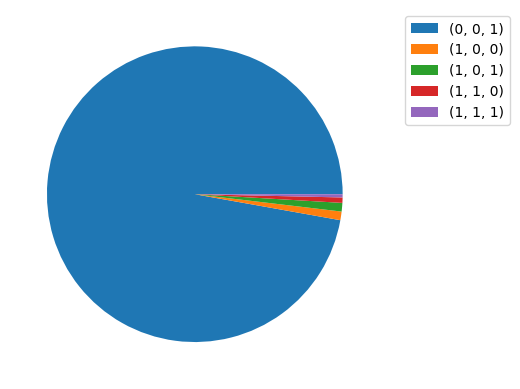

Блок Управление


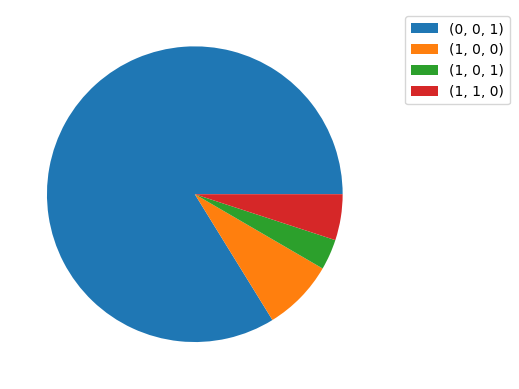

Подразделения вне


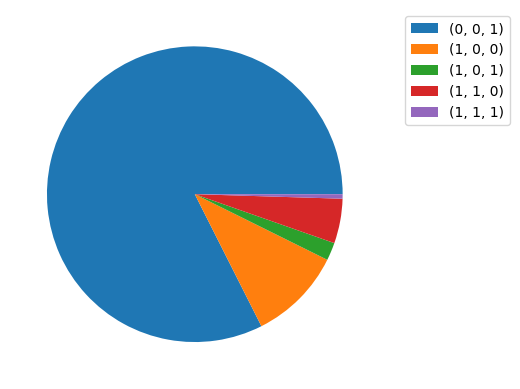

Блок HR


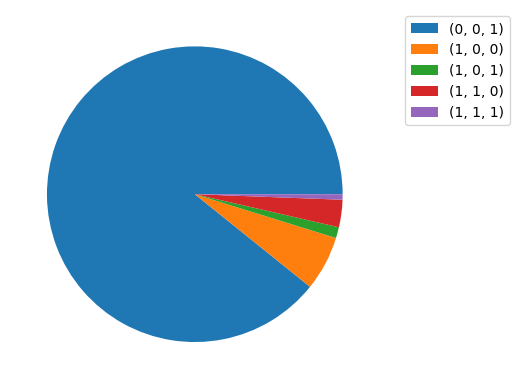

Блок Риски


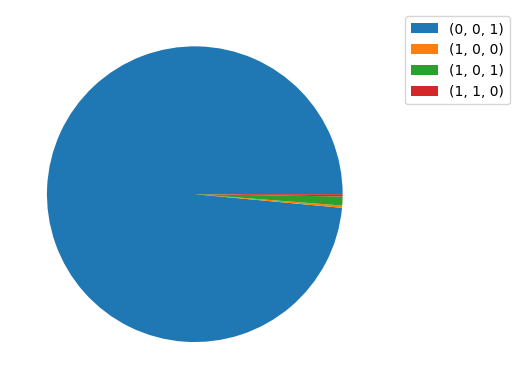

Блок Финансы


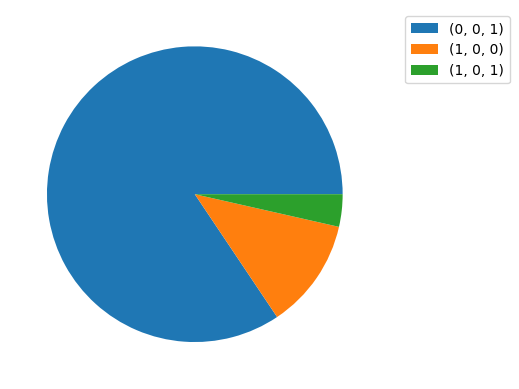

Блок Сеть


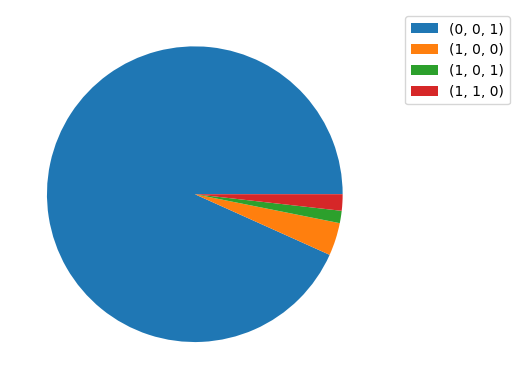

In [60]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [61]:
temp_table

,Подразделение_3,Должность,Исход
0,Блок Технологии,Ведущий инженер по сопровождению,"(0, 0, 1)"
1,Блок Технологии,Руководитель направления,"(0, 0, 0)"
2,Блок Риски,Руководитель направления,"(0, 0, 0)"
3,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
4,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
...,...,...,...
44721,Блок Технологии,Руководитель направления,"(0, 0, 1)"
44722,Блок Технологии,Главный инженер по разработке,"(0, 0, 1)"
44724,Блок Технологии,Главный инженер по разработке,"(0, 0, 0)"
44725,Блок Технологии,Старший инженер по разработке,"(0, 0, 0)"


In [62]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [63]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [64]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.66
Вероятность для Главный инженер по разработке - 0.62
Вероятность для Эксперт - 0.80
Вероятность для Ведущий инженер по разработке - 0.63
Вероятность для Менеджер - 0.74
Вероятность для Исполнительный директор - 0.69
Вероятность для Старший инженер по разработке - 0.62
Вероятность для Руководитель проектов - 0.71
Вероятность для Ведущий инженер - 0.79
Вероятность для Ведущий инженер по сопровождению - 0.69
(0, 0, 1)
Вероятность для Руководитель направления - 0.32
Вероятность для Главный инженер по разработке - 0.37
Вероятность для Ведущий инженер по разработке - 0.35
Вероятность для Исполнительный директор - 0.29
Вероятность для Старший инженер по разработке - 0.36
Вероятность для Менеджер - 0.24
Вероятность для Эксперт - 0.17
Вероятность для Руководитель проектов - 0.27
Вероятность для Ведущий инженер по сопровождению - 0.30
Вероятность для Ведущий инженер - 0.19
(1, 0, 0)
Вероятность для Руководитель направления - 0.01
Вероятно

In [65]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [66]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]}")
    except StatisticsError:
        pass




(0, 0, 0)


Средний показатель - 0.99

Вероятность для Специалист по обслуживанию клиентов Private Banking - 1.0
Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.0
Вероятность для Инженер-разработчик - 1.0
Вероятность для Юрисконсульт - 1.0
Вероятность для Вице-президент-директор департамента - 1.0
Вероятность для Старший экономист - 1.0
Вероятность для Управляющий директор-старший банкир - 1.0
Вероятность для Администратор - 1.0
Вероятность для Бизнес-менеджер - 1.0
Вероятность для Старший банкир - 1.0
Вероятность для Начальник смены-старший охранник - 1.0
Вероятность для Младший аналитик - 1.0
Вероятность для Старший инженер-электрик - 1.0
Вероятность для Сейлз-трейдер - 1.0
Вероятность для Руководитель направления-старший финансовый контролер - 1.0
Вероятность для Инженер-механик - 1.0
Вероятность для Инженер-электрик - 1.0
Вероятность для Территориальный директор - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Исполнительный директор-старший ан

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [67]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [68]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [69]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Стажер-инженер: 0.04
Стажер: 0.04
Управляющий директор: 0.03
Руководитель направления по исследованию данных: 0.02
Руководитель проектов: 0.01
Инженер по разработке: 0.01
Эксперт: 0.01
Старший инженер по разработке: 0.01
Аналитик: 0.01
Ведущий инженер: 0.01


(1, 1, 0)
Стажер: 0.03
Эксперт: 0.01
Исполнительный директор: 0.01
Аналитик: 0.01
Старший инженер по разработке: 0.01
Ведущий инженер по разработке: 0.00
Менеджер: 0.00
Главный инженер по разработке: 0.00
Руководитель направления: 0.00


(1, 0, 1)
Старший эксперт по технологиям: 0.01
Инженер по разработке: 0.01
Ведущий инженер по сопровождению: 0.01
Эксперт: 0.00
Руководитель направления: 0.00
Главный инженер по разработке: 0.00
Менеджер: 0.00
Старший инженер по разработке: 0.00
Исполнительный директор: 0.00
Ведущий инженер по разработке: 0.00


(1, 1, 1)
Исполнительный директор: 0.00
Руководитель направления: 0.00
Главный инженер по разработке: 0.00




Рассмотрение хорошего исхода

In [70]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Ведущий архитектор: 1.00
Бизнес-партнер по кибербезопасности: 0.73
Старший руководитель проектов: 0.68
Исполнительный директор по валидации: 0.59
Старший менеджер: 0.52
Категорийный менеджер: 0.52
Главный специалист: 0.47
Эксперт по валидации: 0.43
Разработчик алгоритма: 0.42
Ведущий аналитик: 0.38


Рассмотрение варианта с игнорированием

In [71]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Специалист по обслуживанию клиентов Private Banking: 1.00
Старший специалист по обслуживанию клиентов Private Banking: 1.00
Инженер-разработчик: 1.00
Юрисконсульт: 1.00
Вице-президент-директор департамента: 1.00
Старший экономист: 1.00
Управляющий директор-старший банкир: 1.00
Администратор: 1.00
Бизнес-менеджер: 1.00
Старший банкир: 1.00


Оценка наиболее уязвимых к фишингу блоков

In [72]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [73]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Блок Финансы: 0.02
Подразделения вне: 0.02
Блок Sberbank: 0.02
Блок Розничный: 0.01
Блок Сеть: 0.01
Блок HR: 0.01
Блок Корпоративно-инвестиционный: 0.01
Другие подразделения: 0.01
Блок Управление: 0.01
Блок GR,: 0.01
Блок Технологии: 0.01
Блок Стратегия: 0.01
Блок Сервисы: 0.00
Блок Риски: 0.00


(1, 1, 0)
Подразделения вне: 0.01
Блок Управление: 0.01
Блок GR,: 0.01
Блок Финансы: 0.01
Другие подразделения: 0.01
Блок Сеть: 0.01
Блок HR: 0.01
Блок Технологии: 0.00
Блок Розничный: 0.00
Блок Корпоративно-инвестиционный: 0.00
Блок Сервисы: 0.00
Блок Риски: 0.00


(1, 0, 1)
Блок Sberbank: 0.02
Блок Риски: 0.00
Другие подразделения: 0.00
Блок Управление: 0.00
Блок Сеть: 0.00
Блок Сервисы: 0.00
Блок Технологии: 0.00
Подразделения вне: 0.00
Блок Корпоративно-инвестиционный: 0.00
Блок HR: 0.00
Блок GR,: 0.00
Блок Розничный: 0.00


(1, 1, 1)
Блок Сервисы: 0.00
Другие подразделения: 0.00
Блок Розничный: 0.00
Блок Технологии: 0.00
Блок HR: 0.00
Блок Корпоративно-инвестиционный: 0.00
Подра

Рассмотрение хорошего исхода

In [74]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Sberbank: 0.48
Блок Риски: 0.45
Блок Сервисы: 0.40
Блок Технологии: 0.32
Другие подразделения: 0.28
Блок Сеть: 0.28
Блок Розничный: 0.25
Блок Корпоративно-инвестиционный: 0.22
Блок HR: 0.16
Блок GR,: 0.14
Блок Финансы: 0.14
Подразделения вне: 0.13
Блок Управление: 0.10
Блок Стратегия: 0.07


Рассмотрение варианта с игнорированием

In [75]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Блок Стратегия: 0.92
Блок Управление: 0.88
Блок GR,: 0.84
Подразделения вне: 0.84
Блок Финансы: 0.84
Блок HR: 0.83
Блок Корпоративно-инвестиционный: 0.76
Блок Розничный: 0.74
Блок Сеть: 0.71
Другие подразделения: 0.70
Блок Технологии: 0.67
Блок Сервисы: 0.59
Блок Риски: 0.54
Блок Sberbank: 0.49


Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [76]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [77]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; Главный инженер по разработке; Эксперт; Ведущий инженер по разработке; Менеджер; Исполнительный директор; Старший инженер по разработке; Руководитель проектов; Ведущий инженер; Главный инженер; Ведущий инженер по сопровождению; Аналитик; Старший инженер; Инженер по разработке; Старший инженер по сопровождению; Старший эксперт по технологиям; Главный инженер по сопровождению; Ведущий эксперт по технологиям; Директор проектов; Руководитель направления по исследованию данных; Управляющий директор; Ведущий эксперт; Ведущий аналитик; Стажер; Главный эксперт; Главный аналитик; Исполнительный директор-начальник отдела; Старший аналитик; Инженер по сопровождению; Главный специалист; Инженер; Управляющий директор-начальник управления; Главный юрисконсульт; Ведущий исследователь данных; Ведущий специалист; Ведущий инспектор; Руководитель направления по аналитике данных; Исследователь данных; Старший эксперт; Стаж

Наиболее подвержены




Скорее да, чем нет

Руководитель направления; 


Скорее нет, чем да

Главный инженер по разработке; 


Наименее подвержены

Исполнительный директор; Эксперт; Ведущий инженер по разработке; Стажер; Старший инженер; Руководитель проектов; Менеджер; Главный специалист-полиграфолог; Руководитель направления по исследованию данных; Главный инженер по сопровождению; Ведущий эксперт по технологиям; Стажер-студент; Ведущий эксперт; Старший эксперт; Аналитик; 

Разделение на управляющий и рядовой состав

In [78]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [79]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [80]:
len(lead_workers)

222

In [81]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [82]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [83]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [84]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [85]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.672
1,"(0, 0, 1)",0.313
2,"(1, 0, 0)",0.008
3,"(1, 1, 0)",0.004
4,"(1, 0, 1)",0.003
5,"(1, 1, 1)",0.001


In [86]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [87]:
len(simple_workers)

149

In [88]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [89]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [90]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [91]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [92]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.749
1,"(0, 0, 1)",0.231
2,"(1, 0, 0)",0.010
3,"(1, 1, 0)",0.006
4,"(1, 0, 1)",0.004
5,"(1, 1, 1)",0.001


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [93]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [94]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Вице-президент-директор департамента - 1.00
Вероятность для Управляющий директор-старший банкир - 1.00
Вероятность для Начальник смены-старший охранник - 1.00
Вероятность для Руководитель направления-старший финансовый контролер - 1.00
Вероятность для Территориальный директор - 1.00
Вероятность для Исполнительный директор-старший аналитик - 1.00
Вероятность для Начальник управления - 1.00
Вероятность для Управляющий директор, заместитель директора департамента-начальник управления - 1.00
Вероятность для Руководитель проектов по развитию бизнеса - 1.00
Вероятность для Директор по финансовым институтам - 1.00
Вероятность для Управляющий директор-директор лаборатории - 1.00
Вероятность для Главный трейдер - 1.00
Вероятность для Начальник центра - 1.00
Вероятность для Управляющий директор по исследованию данных - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Директор по работе со специальными проектами - 1

In [95]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [96]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 0.99

Вероятность для Специалист по обслуживанию клиентов Private Banking - 1.00
Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.00
Вероятность для Инженер-разработчик - 1.00
Вероятность для Юрисконсульт - 1.00
Вероятность для Старший экономист - 1.00
Вероятность для Администратор - 1.00
Вероятность для Бизнес-менеджер - 1.00
Вероятность для Старший банкир - 1.00
Вероятность для Младший аналитик - 1.00
Вероятность для Старший инженер-электрик - 1.00
Вероятность для Сейлз-трейдер - 1.00
Вероятность для Инженер-механик - 1.00
Вероятность для Инженер-электрик - 1.00
Вероятность для Уборщик - 1.00
Вероятность для Техник-электрик - 1.00
Вероятность для Помощник заместителя Председателя Правления - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Старший юрисконсульт - 1.00
Вероятность для Отраслевой кредитный менеджер - 1.00
Вероятность для Помощник первого заместителя Председателя Правлен

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [97]:
full_temp_table

,Подразделение_3,Должность,Исход
0,Блок Технологии,Ведущий инженер по сопровождению,"(0, 0, 1)"
1,Блок Технологии,Руководитель направления,"(0, 0, 0)"
2,Блок Риски,Руководитель направления,"(0, 0, 0)"
3,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
4,Блок Технологии,Исполнительный директор,"(0, 0, 0)"
...,...,...,...
44724,Блок Технологии,Главный инженер по разработке,"(0, 0, 0)"
44725,Блок Технологии,Старший инженер по разработке,"(0, 0, 0)"
44726,Блок Технологии,Старший инженер по разработке,"(0, 0, 0)"
44727,Блок HR,Стажер-инженер,"(0, 0, 0)"


In [98]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [99]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",31087
1,"(0, 0, 1)",12873
2,"(1, 0, 0)",382
3,"(1, 1, 0)",192
4,"(1, 0, 1)",150
5,"(1, 1, 1)",45


In [100]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [101]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [102]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.695
1,"(0, 0, 1)",0.288
2,"(1, 0, 0)",0.009
3,"(1, 1, 0)",0.004
4,"(1, 0, 1)",0.003
5,"(1, 1, 1)",0.001


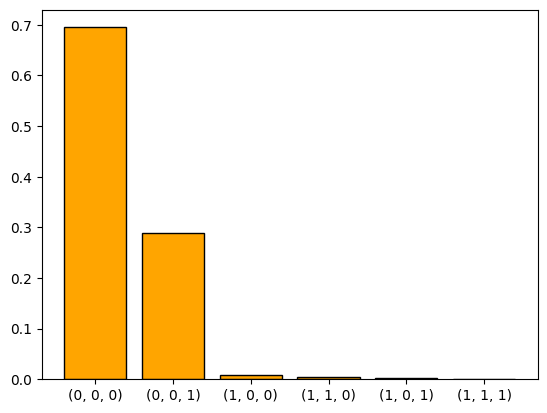

In [103]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()